![DSL_logo](dsl_logo.png)


# Python 2.0!

Welcome to the Digital Scholarship Lab Level 2 Python workshop. Before proceeding please make sure you've completed [part 1](https://brockdsl.github.io/Intro_to_Python_Workshop/) 

Which covers:
- variables
- math
- conditional
- loops
- functions


What we'll learn today is:
- importing libraries
- analyzing data with pandas
- plotting data with matplot lib


We'll be using Python as a Data Analysis tool



Join the [Etherpad](http://rtod.library.brocku.ca:32771/p/Python2)






Before we get going the next cell should look totally familar to you

In [ ]:
scores = [3,5,6,2,1,6]

def find_mean(scores):
    
    sum = 0
    for s in scores:
        sum = sum + s
        
    return sum/len(scores)


find_mean(scores)


## Importing Libraries

- Our end goal is to re-use as much code as possible
- To do this we load in different Libraries using the `import` command
- For this example we want to load in the [statistics](https://docs.python.org/3/library/statistics.html) library


In [ ]:
import statistics

print(statistics.mean(scores))
print(statistics.median(scores))
print(statistics.mode(scores))



How would we use the [math](https://docs.python.org/3/library/math.html) library to find the square root of the variable called _number_ following? 

In [ ]:
import 

number = 81


We'll be focusing on data analysis for the rest of this workshop so let's import some libraries: [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org) & [matplotlib](https://matplotlib.org)

In [1]:
#This line is for Jupyter's benefit
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# EXERCISE: Analyzing Data

![sick](https://upload.wikimedia.org/wikipedia/commons/9/97/Caladrius2.jpg)

We'll be exploring how to do analysis with a riff of a data set taken from [Kaggle](https://www.kaggle.com/carlolepelaars/toy-dataset/). It has been localized with Canadian Cities and shortened a tad. Let's view the [file](canadian_toy_dataset.csv)

The data has 5 columns
- _City_ is one of 6 Canadian Cities
- _Gender_ is the self reported gender of the person
- _Age_ is a integer that represents how old the person in in the record is
- _Income_ the annual salary of the person as an integer
- _ill_ a 'Yes' or 'No' to indicate if the person is suffering from our mystery illness



## Brainstorming: what questions we'd like to ask


Let's take a look at the file and figure out what types of questions we can ask from it?
What would we like to graph out?


Add you thoughts to the [etherpad](http://139.57.126.30:32780/p/Python2)

## Loading the data

We'll load the data into a pandas `dataframe`. A dataframe has a lot of properties we can look into

In [2]:
#Load the file
data = pd.read_csv("canadian_toy_dataset.csv")

#Tell it what our columns are
data.columns = ["city","gender","age","income","ill"]

#Show the first 5 lines
data.head(5)

,city,gender,age,income,ill
0,Montreal,Male,41,40367,No
1,Montreal,Male,54,45084,No
2,Montreal,Male,42,52483,No
3,Montreal,Male,40,40941,No
4,Montreal,Male,46,50289,No


The first column is the `index` of the dataframe. Often that is automatically created for us. We can view details about it with:

In [3]:
data.index

RangeIndex(start=0, stop=150000, step=1)

If we wanted to see all of the values we add the `.tolist()` function to it

In [4]:
data.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


# Asking question from the data

Dataframes are great because we can ask for more complicated data and analysis and get they'll do the hard work for us

## Counting

When we want to find out how many of something is in a dataframe we use the `.count()` function.

How many records are in the dataset?

In [5]:
data.count()

city      150000
gender    150000
age       150000
income    150000
ill       150000
dtype: int64

## Grouping and  Counting

We also need to gather the entries we need by grouping them together with the `.groupby()` function. We can chain these things together to make longer more complicated enquires of the data.

*NB:* Grouping a dataframe will cause a new index to be applied


How many people are `ill`?

In [6]:
data.groupby("ill").count()

,city,gender,age,income
ill,,,,
No,137861,137861,137861,137861
Yes,12139,12139,12139,12139


How many people are `Male` in this dataset?

## Grouping and Averaging

If we want to do some math on the data we need to cluster it together a bit. We use `.groupby()` and `.mean()` to accomplish this.


What is the average income of people in `Waterloo`?

In [7]:
data.groupby("city")["income"].mean()

city
Edmonton      90277.513423
Halifax       91554.571497
Montreal      45252.231187
Ottawa        70991.612808
Regina       100756.209178
Toronto       96857.131393
Vancouver     95264.155410
Waterloo     135078.415782
Name: income, dtype: float64

What is the average age of people in each `city`?

Other useful functions to apply to dataframes:

- `.max()`
- `.min()`

What is the minimum and maximum age seen in the data

In [8]:
print(data["age"].max())
print(data["age"].min())

65
25


What is the maximum and minimum income seen in the data set?

# Sorting

We can apply sorting to our dataframe actions by adding `.sort_values()` to the end of our count and average statements and telling it what `column` to sort by with the added statement `by = "column"`.

What city has the most `ill` people?

In [9]:
data.groupby("city").count().sort_values(by = "ill",ascending = False)

,gender,age,income,ill
city,,,,
Toronto,50307,50307,50307,50307
Vancouver,32173,32173,32173,32173
Montreal,19707,19707,19707,19707
Waterloo,14219,14219,14219,14219
Edmonton,12292,12292,12292,12292
Halifax,8301,8301,8301,8301
Ottawa,8120,8120,8120,8120
Regina,4881,4881,4881,4881


Answer:

What city has the highest average income?

In [10]:
data.groupby("city").mean().sort_values(by = "income", ascending = False)

,age,income
city,,
Waterloo,44.992756,135078.415782
Regina,44.965171,100756.209178
Toronto,44.922118,96857.131393
Vancouver,44.994094,95264.155410
Halifax,45.197807,91554.571497
Edmonton,44.651237,90277.513423
Ottawa,44.802709,70991.612808
Montreal,45.058761,45252.231187


Answer: 

## Unique entries

Here we use `.unique()` to only give the first instances of the item. Results are returned as a list, which is useful for us later

In [ ]:
data["city"].unique()

What are unique values for the `Age` field?

## Values Counts

This will give you the values associated with the unique values that are seen in a column

In [ ]:
data["city"].value_counts()

## Making selections into List

We add `.tolist()` to end of selections to get lists of the results. Useful for making graphs, as we'll see later.

In [ ]:
data["city"].value_counts().tolist()

## Selecting subsets of data

To make life easier we can create dataframes that just have the values we are interested in

Say we want to make a dataframe of only those that are `ill` we'd do the following:

In [12]:
ill_people = data[data['ill'] == "Yes"]
ill_people

,city,gender,age,income,ill
10,Montreal,Female,48,41524,Yes
17,Montreal,Male,38,46373,Yes
23,Montreal,Female,27,34292,Yes
29,Montreal,Male,45,47421,Yes
38,Montreal,Female,61,39881,Yes
40,Montreal,Female,26,16168,Yes
68,Montreal,Male,51,44030,Yes
70,Montreal,Female,38,31953,Yes
81,Montreal,Male,46,27092,Yes
97,Montreal,Male,44,47860,Yes


Can you make a new dataframe that just has people from `Waterloo` in it. Display the first 5 entries.

In [ ]:
waterloo_people = 


With our `ill_people` dataframe how can we find out how many people are `ill` in each city. 

*Hint:* we can use `.groupby()` and `.count()` to do this

Can we sort our previous results? We can use the `.sort_values()` to accomplish this

# Putting more pieces together

We can put all of these calculations together to ask more complex questions of the data.



How many people are `ill` and above the average age of all people in the data set?

In [ ]:

#We found this earlier, so we'll just repeat it here
average_age = 45

above_average_ill = ill_people[ill_people['age'] > average_age]['ill'].count()

print(above_average_ill)

What percentage of the above average age people are `ill`?

In [ ]:

total_ill =

(above_average_ill / total_ill ) * 100


What does this tell us about the older people in the dataset?

Answer:

# Graphing Results

We can use the `matplotlib` library to generate some graphs of our results. We always gives lists as parameters for the graphs

## Pie Graphs
Let's draw a pie graph of the number of people that are `ill` as a proportion of everyone

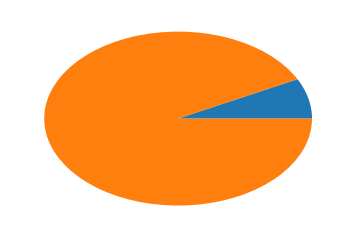

In [14]:

total_ill_people = ill_people.count()['ill']
total_people = data.count()['ill']


# Matplot lib always wants data in a list, so we'll make one
pie_data = [total_ill_people,total_people]


plt.pie(pie_data)
plt.show()

Say we want to add some more details to our pie graph, like `labels` and a `title`

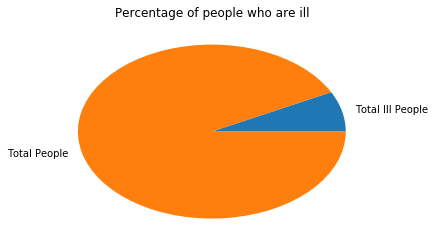

In [15]:
pie_data = [total_ill_people,total_people]
lables = ["Total Ill People","Total People"]

plt.pie(pie_data,labels=lables)
plt.title("Percentage of people who are ill")
plt.show()

Can you create a pie graph that shows the gender balance of who is `ill`?

In [ ]:
# Hint: you'll need to select and count

females_ill = #FILL
males_ill = #FILL

pie_data = [females_ill,males_ill]
lables = ["Females","Males"]

plt.pie(pie_data,labels=lables)
plt.title("Gender distibution of those ill")
plt.show()

## Automatic Histograms


Say we wanted to plot out the income distribution of our data set as a [historgram](https://en.wikipedia.org/wiki/Histogram) 

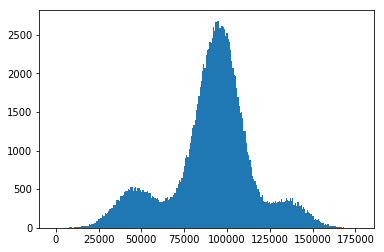

In [16]:

# this represents how many pieces we want to chop our series into, more bins has a higher resolution
bins = 250

plt.hist(data["income"],bins)
plt.show()

Let's add some labels to our axes

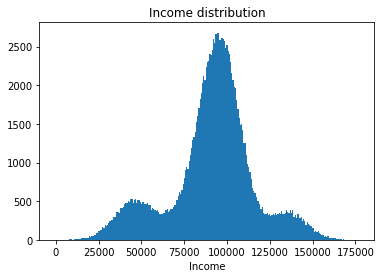

In [17]:
# this represents how many pieces we want to chop our series into, more bins has a higher resolution
bins = 250

plt.hist(data["income"],bins)

plt.title("Income distribution")
plt.xlabel("Income")

plt.show()

Can you draw a histogram of the `age` distribution? Make sure to give it a `title` and a good `xlabel` and use an appropriate number of bins

In [ ]:
bins = #FILL

plt.hist() #FILL
plt.title() #FILL
plt.xlable() #FILL

plt.show()

## Bar Graphs

Let's try to draw how many people are `ill` in each city Let's remind ourself of the data:

In [ ]:
ill_people.groupby("city").count().sort_values(by = "ill")

Lets build a list of the cities in the dataframe. Remember the *bolded* column is the index of the dataframe

In [ ]:
#Just like above
cities = ill_people.groupby("city").count()

#We want the cities in increasing number of those ill
cities = cities.sort_values(by = "ill")

#We need lists for our graphing components
cities = cities.index.tolist()

cities

In [ ]:
#Just like first cell that started this section
ill_by_city = ill_people.groupby("city").count()

#We want the numbe of ill people in increasing number of those ill
ill_by_city = ill_by_city.sort_values(by = "ill")

#We need lists for our graphing components
ill_by_city = ill_by_city['ill'].tolist()

ill_by_city

In [ ]:
plt.bar(cities, ill_by_city)

#We can rotate our labels so the don't overlap with one another
plt.xticks(rotation=90)

plt.show()


What do you notice about the x-axis?

Answer: 

# Bringing it all together

Can you make a dataframe of people who are not `ill` and graph them based on what city they are in. Some of the work is written out for you


In [18]:
#We'll make a new data frame of just the healthy people
healthy_people = data[data['ill'] == "No"]

healthy_people.groupby("city").count().sort_values(by = "ill")

,gender,age,income,ill
city,,,,
Regina,4487,4487,4487,4487
Ottawa,7452,7452,7452,7452
Halifax,7615,7615,7615,7615
Edmonton,11281,11281,11281,11281
Waterloo,13041,13041,13041,13041
Montreal,18094,18094,18094,18094
Vancouver,29605,29605,29605,29605
Toronto,46286,46286,46286,46286


We'll construct our `cities` list similar to above. 

Just add in some details on the lines marked with `#FILL` 

In [ ]:
cities = healthy_people.groupby("").count() #FILL
cities = cities.sort_values(by = "") #FILL
cities = cities.index.tolist()
cities

We'll now construct a list that is number of health people in each city ordered from smallest to largest. 

Just add in some details on the lines marked with `#FILL`

In [ ]:
healthy_by_city = healthy_people.groupby("").count() #FILL
healthy_by_city = healthy_by_city.sort_values(by = "") #FILL
healthy_by_city = healthy_by_city[""].tolist() #FILL

healthy_by_city

In [ ]:
plt.bar(cities, healthy_by_city)
plt.xticks(rotation = 90)
plt.show()

# Congrats!

You now know the fundamentals of Python for Datascience
